<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Statistical Modeling and Model Validation

---

## Objective
The goal of this assessment is to guide you through the modeling workflow to produce the best possible model. In this lesson, you will apply the best practices you've learned to date to slice your data and validate your model. 

You'll demonstrate the following skills:

**Linear Regression**
* Handling categorical features in a scikit-learn model.
* Carrying out a train/test split.
* Training a model.
* Evaluating that model on the testing data.

**K-Nearest Neighbors:**
* Preparing your data for modeling.
* Scaling your data.
* Tuning a hyperparameter using k-fold cross-validation.
* Selecting a model based on a tuning parameter.
* Using a model to make predictions on new data.

## Imports

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

%matplotlib inline

# Part 1: Regression on MPG Data

## Read the Data
The [`mpg` data set](https://archive.ics.uci.edu/ml/datasets/auto+mpg) represents the fuel economy (in miles per gallon) for 38 popular models of car, measured between 1999 and 2008.

|Factor      |Type                              |Description                                               |
|------------|----------------------------------|----------------------------------------------------------|
|manufacturer|multi-valued discrete             |Vehicle manufacturer                                      |
|model       |multi-valued discrete             |Model of the vehicle                                      |
|displ       |continuous                        |Size of engine [litres]                                   |
|year        |multi-valued discrete             |Year of vehicle manufacture                               |
|cyl         |multi-valued discrete             |Number of ignition cylinders                              |
|trans       |multi-valued discrete             |Transmission type (manual or automatic)                   |
|drv         |multi-valued discrete             |Driven wheels (f=front, 4=4-wheel, r=rear wheel drive)    |
|city        |continuous                        |Miles per gallon, city driving conditions (fuel economy)  |
|fl          |multi-valued discrete             |Vehicle type                                              |
|class       |multi-valued discrete             |Vehicle class (suv, compact, etc)                         |

In [3]:
# Read the mpg data in the data folder into this repository.
mpg = pd.read_csv('data/mpg.csv')

## Explore the Data
Use this space to familiarize yourself with the data set.

Convince yourself that there are no issues with the data. If you find any, clean them now.

In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.shape

(234, 11)

In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [7]:
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [8]:
mpg.isnull().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
class           0
dtype: int64

In [9]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [10]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [11]:
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
subaru        14
hyundai       14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [12]:
mpg[mpg.manufacturer == 'subaru']

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
159,subaru,forester awd,2.5,1999,4,manual(m5),4,18,25,r,suv
160,subaru,forester awd,2.5,1999,4,auto(l4),4,18,24,r,suv
161,subaru,forester awd,2.5,2008,4,manual(m5),4,20,27,r,suv
162,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv
163,subaru,forester awd,2.5,2008,4,auto(l4),4,20,26,r,suv
164,subaru,forester awd,2.5,2008,4,auto(l4),4,18,23,p,suv
165,subaru,impreza awd,2.2,1999,4,auto(l4),4,21,26,r,subcompact
166,subaru,impreza awd,2.2,1999,4,manual(m5),4,19,26,r,subcompact
167,subaru,impreza awd,2.5,1999,4,manual(m5),4,19,26,r,subcompact
168,subaru,impreza awd,2.5,1999,4,auto(l4),4,19,26,r,subcompact


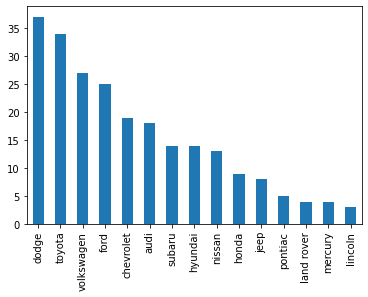

In [35]:
#make a histogram of types of cars
mpg.manufacturer.value_counts().plot(kind = 'bar')

## Dummify the `drv` Variable

In [118]:
#dummify the drv variable 
drv_dummy = pd.get_dummies(mpg.drv, prefix = 'drv', drop_first = True)

In [119]:
drv_dummy

,drv_f,drv_r
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
229,1,0
230,1,0
231,1,0
232,1,0


In [120]:
drv_dummy.sample(n=5, random_state=1)

,drv_f,drv_r
199,0,0
69,0,0
233,1,0
39,1,0
138,0,0


In [121]:
#Concatonate to the dataset 
mpg_dummies = pd.concat([mpg, drv_dummy],axis=1)

In [122]:
mpg_dummies.sample(n=5, random_state=1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,drv_f,drv_r
199,toyota,land cruiser wagon 4wd,5.7,2008,8,auto(s6),4,13,18,r,suv,0,0
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,0,0
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize,1,0
39,dodge,caravan 2wd,3.3,1999,6,auto(l4),f,16,22,r,minivan,1,0
138,mercury,mountaineer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv,0,0


## Split Your Data Into Factors (`X`) and Target (`y`)
You only need to keep the `displ` and `drv` variable(s) here, as those are the only columns you'll be fitting your model on in the next section.

In [124]:
from sklearn.model_selection import train_test_split
#keep displ and drv 
feature_cols = ['drv_f', 'drv_r', 'displ']
X = mpg_dummies[feature_cols]
y = mpg_dummies.hwy

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1234)

## Instantiate a Linear Regression Model Object Predicting Highway MPG
Instantiate a `LinearRegression` object here.

In [125]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)
list(zip(feature_cols, linreg.coef_))

[('drv_f', 4.790598104070745),
 ('drv_r', 5.257864581624352),
 ('displ', -2.914084563392689)]

## Evaluate Your Model

- Run five-fold cross-validation on your data.
  - Report the mean of the mean squared error across five folds.
  - Report the mean R-squared value across five folds.

In [89]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=5, shuffle = True, random_state = 1234)

print('Cross Validated MSE:', np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('Cross Validated RMSE:', np.sqrt(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('Cross Validated R-squared:', np.mean(cross_val_score(linreg, X, y, cv=kf)))

Cross Validated MSE: 9.588123084816457
Cross Validated RMSE: 3.09646945484958
Cross Validated R-squared: 0.7331085262059374


# Part 2: Classification Using KNN

## Read in the `diamonds` Data
This is data regarding 50,000 round-cut diamonds.

|Factor            |Description                                                                                 |
|------------------|--------------------------------------------------------------------------------------------|
|price             |price in US dollars (326-18,823)                                                            |
|carat             |weight of the diamond (0.2--5.01)                                                           |
|cut               |quality of the cut (Fair, Good, Very Good, Premium, Ideal)                                  |
|color             |diamond colour, from J (worst) to D (best)                                                  |
|clarity           |how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))            |
|x                 |length in mm (0--10.74)                                                                     |
|y                 |width in mm (0--58.9)                                                                       |
|z                 |depth in mm (0--31.8)                                                                       |
|depth             |total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)                          |
|table             |width of top of diamond relative to widest point (43--95)                                   |

In [218]:
dia = pd.read_csv('data/diamonds.csv')

## Explore the Data

In [219]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [220]:
dia.shape

(53940, 10)

In [221]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [222]:
dia.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [223]:
dia.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [224]:
dia.carat.mean()

0.7979397478679852

In [225]:
dia.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [226]:
dia.describe(include = ['object'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


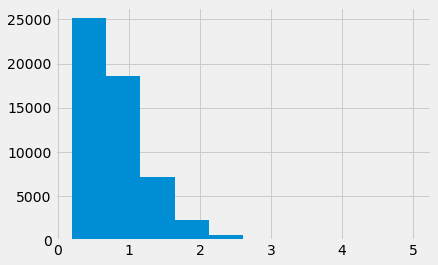

In [227]:
dia.carat.hist()

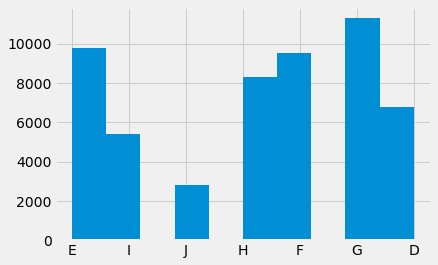

In [228]:
dia.color.hist()

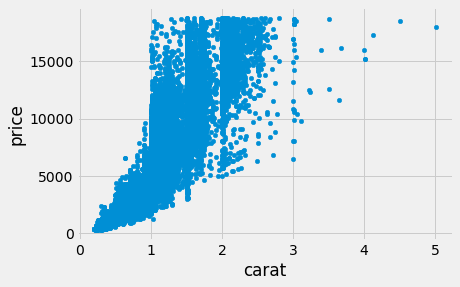

In [229]:
dia.plot(kind='scatter', x='carat', y= 'price')

In [230]:
dia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Filter Your Data
Filter your data to only contain diamonds with `'Ideal'` and `'Good'` cuts.

In [231]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [232]:
dia1 = dia[(dia['cut'] == 'Ideal') | (dia['cut'] == 'Good')]

In [233]:
dia1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
...,...,...,...,...,...,...,...,...,...,...
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54
53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61


## Downsample the Majority Class

In [234]:
#theres way more ideals 
#balance the ideals and goods
#use the resample function 

ideal_down = dia1[(dia1.cut == 'Ideal')]
good_down = dia1[(dia1.cut == 'Good')]

ideal_down_resample = ideal_down.sample(good_down.shape[0], random_state=1)

print('undersampling:')

print('size:  %1i' % (dia1.shape[0]))
print('ideal size:  %1i' % (ideal_down_resample.shape[0]))
print('good size:  %1i' % (good_down.shape[0]))

undersampling:
size:  26457
ideal size:  4906
good size:  4906


In [235]:
good_down

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
17,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70
18,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71
...,...,...,...,...,...,...,...,...,...,...
53913,0.80,Good,G,VS2,64.2,58.0,2753,5.84,5.81,3.74
53914,0.84,Good,I,VS1,63.7,59.0,2753,5.94,5.90,3.77
53916,0.74,Good,D,SI1,63.1,59.0,2753,5.71,5.74,3.61
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54


In [236]:
dia_norm = pd.concat([ideal_down_resample, good_down])

In [237]:
dia_norm.tail(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
53785,0.89,Good,E,SI2,64.3,65.0,2728,6.00,5.95,3.84
53787,0.90,Good,J,SI1,63.2,60.0,2729,6.09,6.12,3.86
53803,0.90,Good,H,SI1,63.8,56.0,2732,6.07,6.02,3.86
53814,0.77,Good,H,VVS2,64.3,57.9,2734,5.70,5.86,3.71
53838,0.80,Good,D,SI1,63.7,57.0,2738,5.88,5.80,3.72
53840,0.71,Good,H,VVS2,60.4,63.0,2738,5.69,5.74,3.45
53886,0.70,Good,D,VS2,58.0,62.0,2749,5.78,5.87,3.38
53890,0.73,Good,E,SI1,57.9,55.0,2749,6.00,5.96,3.46
53895,0.70,Good,F,VS1,57.8,61.0,2751,5.83,5.79,3.36
53897,1.02,Good,H,I1,64.3,63.0,2751,6.28,6.23,4.02


## Prepare Your `X`, `y` Matrices
Construct an `X` matrix using **all numeric columns** from the `diamonds` data.

You will be predicting `cut`. Construct a `y` vector in a numeric format that can be used by scikit-learn.

In [238]:
#find all numeric columns 
dia_norm.describe()

,carat,depth,table,price,x,y,z
count,9812.000000,9812.000000,9812.000000,9812.000000,9812.000000,9812.000000,9812.000000
mean,0.777690,62.037760,57.317550,3711.612108,5.678329,5.692651,3.524024
std,0.450131,1.647112,2.597319,3767.060277,1.072953,1.100429,0.666250
min,0.230000,54.300000,43.000000,327.000000,0.000000,0.000000,0.000000
25%,0.400000,61.300000,56.000000,942.000000,4.710000,4.727500,2.940000
50%,0.700000,62.100000,57.000000,2336.000000,5.660000,5.670000,3.510000
75%,1.010000,63.400000,58.800000,4899.000000,6.430000,6.450000,4.020000
max,3.220000,67.000000,66.000000,18806.000000,9.490000,31.800000,5.920000


In [239]:
#Change y into numeric variables

dia_norm['cut_type'] = dia.cut.map({'Ideal':0, 'Good':1})

In [240]:
dia_norm

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_type
17129,1.21,Ideal,H,VS1,60.7,57.0,6834,6.86,6.89,4.17,0.0
35347,0.38,Ideal,E,SI1,61.9,55.0,898,4.70,4.64,2.89,0.0
8842,0.90,Ideal,G,VS1,61.4,57.0,4479,6.18,6.32,3.84,0.0
53424,0.54,Ideal,D,VVS2,61.3,56.0,2671,5.22,5.26,3.21,0.0
9985,1.26,Ideal,I,SI2,59.6,57.0,4704,7.04,7.01,4.19,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53913,0.80,Good,G,VS2,64.2,58.0,2753,5.84,5.81,3.74,1.0
53914,0.84,Good,I,VS1,63.7,59.0,2753,5.94,5.90,3.77,1.0
53916,0.74,Good,D,SI1,63.1,59.0,2753,5.71,5.74,3.61,1.0
53927,0.79,Good,F,SI1,58.1,59.0,2756,6.06,6.13,3.54,1.0


In [241]:
#check to see how many of each there are
dia_norm.cut_type.value_counts()

1.0    4906
0.0    4906
Name: cut_type, dtype: int64

In [242]:
feature_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
#construct a y vector in a numeric format that can be used by scikit-learn - does that mean make a dummy variable? 
X = dia_norm[feature_cols]
y = dia_norm.cut_type

In [243]:
y.tail()

53913    1.0
53914    1.0
53916    1.0
53927    1.0
53936    1.0
Name: cut_type, dtype: float64

## Scale Your `X` Matrix Using a StandardScaler

In [244]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Why Did We Just Do That?
In the cell below, provide a 2–3 sentence explanation of why scaling our $X$ matrix was necessary here. What could have gone wrong if we didn't?

Scaling for KNN is important because KNN uses the distance between two points. If two features are on different scales, the distances between them on each coordinate might be given falsely disproportionate weights. If we didn't scale, it's possible that KNN would make all of its decisions based on the feature with the widest scale.

## Split Into Testing and Training Groups

Now that we've downsampled/balanced our classes, as well as removed unused factors, we're ready to split into testing and training groups. We're doing this avoid _leaking information into our testing set_. 

- First, we'll perform cross-validation on our _training_ set, finding an optimal value for $k$. 
- After this, we'll take that value of $k$ and use it to fit our model to the _training_ set, creating our tuned model.
- Finally, we will take this same model and use it to _predict_ and _score_ against our _testing_ set.
- Note that our model at this point will have never seen nor trained against the _testing_ set.

In the future, we can (and should!) automate this process using a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) — a tool used to abstract our modeling process, allowing data to be processed without manual intervention.

In [245]:
#What order do I do scaling and splitting in? 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

## K-Nearest Neighbors
You're going to fit a KNN model here, but you first need to tune your model to find the best value of $k$. Loop through values of $k$ you think are appropriate (Hint: Look for "elbows" in your result curves) and select the value that produces the best model with respect to **five-fold cross-validation**.

**Important**: Do not use _any_ code copied and pasted directly from the lecture! Typing things out yourself is 100% essential to the learning process. It's OK to use the exact same strategies as we did in class, but be sure to enter them manually.

In [246]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [247]:
#train model using k =1 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [248]:
#test accuracy of the model 
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.7713004484304933


In [249]:
#train model with K = 50

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.5947818997146351


In [250]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

In [251]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 50.

k_range = list(range(1, 50))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100.
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [252]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Produce the Plot of Tuning Parameter ($k$) vs. Accuracy
What is the "best" value of k?

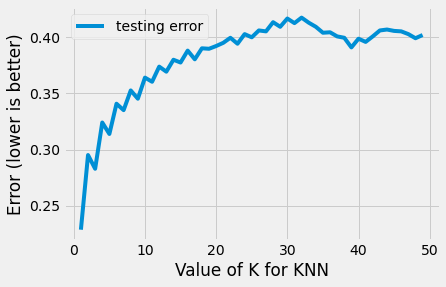

In [253]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [254]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
print(df.tail())

   training error  testing error
K                               
5        0.210762       0.313901
4        0.216572       0.324093
3        0.164391       0.282919
2        0.172544       0.295149
1        0.057175       0.228700


In [255]:
# make sure 1 is the lowest error 
min(list(zip(testing_error, k_range)))


(0.22869955156950672, 1)

## Produce the Best KNN Model
Now that you know the optimal value of $k$, fit a KNN on the training set (this training set should still filtered to `'Ideal'` and `'Good'` cuts).

In [256]:
#train model with K = 1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.7713004484304933


## Does This Model Outperform the Baseline?

In [257]:
#comparing to a null accuracy 
most_freq_class = y_train.value_counts().index[0]

print(y_train.value_counts())
most_freq_class

0.0    3680
1.0    3679
Name: cut_type, dtype: int64


0.0

In [258]:
y_test.value_counts()[most_freq_class] / len(y_test)

0.49979616795760295

(0.0, 0.42688544639217285)

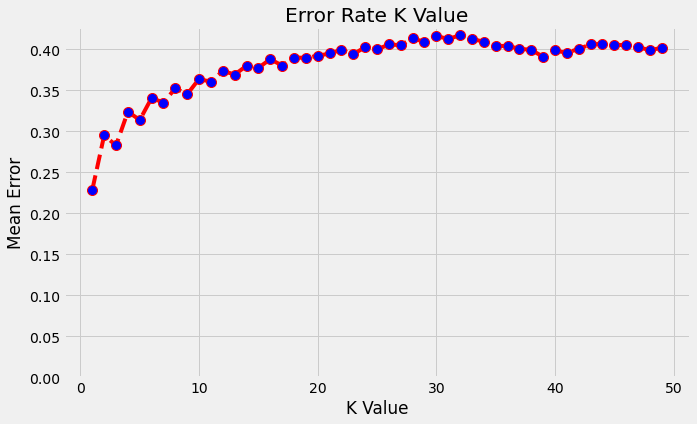

In [259]:
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    
# Plot our results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.ylim(0)

Yes, it is better than the baseline. 

## Prediction
Suppose I have a diamond with the following specifications:

In [260]:
new_diamond = pd.DataFrame({
    'carat': 0.24,
    'depth': 60.,
    'table': 64.,
    'price': 400.,
    'x': 3.,
    'y': 3.,
    'z': 3.
}, index=[0])

What do you predict to be the cut of this diamond?

**Big hint:** Don't forget to scale this new data point appropriately!

In [261]:
new_diamond

,carat,depth,table,price,x,y,z
0,0.24,60.0,64.0,400.0,3.0,3.0,3.0


In [262]:
predict = knn.predict(scaler.transform(new_diamond))
print(predict)

[1.]


# Part 3: Now _YOU_ Model!
Put your skills to the test.

Using the _full_ `diamonds` data set, produce a **logistic regression** model that achieves the best five-fold cross-validation. Note that, for this problem, you're performing multi-class classification. The response variable has _five_ categories.

In [263]:
dia_3 = dia

In [268]:
dia_3.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [270]:
#remapping the y variable
dia_3['cuttype'] = dia_3.cut.map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})

In [271]:
dia_3.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,cuttype
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,2
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,2
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,2


In [ ]:
ideal_down = dia_3[(dia_3.cuttype == 'Ideal')]
good_down = dia_3[(dia_3.cuttype == 'Good')]

ideal_down_resample = ideal_down.sample(good_down.shape[0], random_state=1)

print('undersampling:')

print('size:  %1i' % (dia1.shape[0]))
print('ideal size:  %1i' % (ideal_down_resample.shape[0]))
print('good size:  %1i' % (good_down.shape[0]))

In [293]:
from sklearn.model_selection import train_test_split

feature_cols = ['carat','depth', 'table', 'price', 'x', 'y', 'z']
X = dia_3[feature_cols]
y = dia_3.cuttype

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1234)

In [294]:
y.value_counts()

4    21551
3    13791
2    12082
1     4906
0     1610
Name: cuttype, dtype: int64

In [295]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

logistic_pred_class = logreg.predict(X_test)

#Measure accuracy
metrics.accuracy_score(y_test, logistic_pred_class)

C:\Users\611810\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4027437893956248

In [300]:
#import
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

lr= LogisticRegression()

kf = model_selection.KFold(n_splits=7,shuffle=True, random_state=123)

#fit 
feature_cols = ['carat','depth', 'table', 'price', 'x', 'y', 'z']
X = dia_3[feature_cols]
y = dia_3.cuttype
le = preprocessing.LabelEncoder()
y_bl = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_bl, test_size=0.3, random_state=1337, stratify=y_bl)

In [303]:
logreg = LogisticRegression()

#predict
logreg.fit(X,y_bl)
dia_3['pred'] = logreg.predict(X)

C:\Users\611810\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [304]:
#only printing out the majority classes
#could plot a confusion matrix to look at this
#worked on this with Greg and Alex 3-8
dia_3.pred.value_counts()

4    49235
3     4705
Name: pred, dtype: int64

In [305]:
dia_3.pred.head(10)

0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: pred, dtype: int64